# Kaggle Project

## Describe Your Dataset

**URL:** https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

**Task:**
Diabetes Prediction

**Features(x):**

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree functionr

Age: Age (years)

Cabin : Cabin Number



**Target(y):**


Outcome: Class variable (0 or 1)

---

## Build Your Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

!pip install xgboost
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/82105/Downloads/diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
data.shape

(768, 9)

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Checking Null Values**

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Correlation Matrix**

<AxesSubplot:>

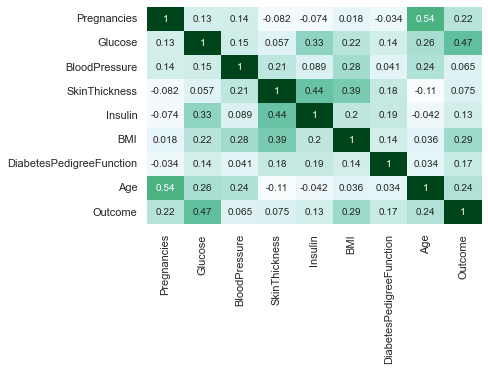

In [6]:
sns.heatmap(data.corr(),cbar=False,cmap='BuGn',annot=True)

값이 0으로 되어있는 결측치 해당 데이터의 mean으로 처리
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

In [7]:
col=['Glucose' ,'BloodPressure' ,'SkinThickness', 'Insulin' ,'BMI']

In [8]:
for i in col:
  data[i].replace(0,data[i].mean(),inplace=True)

## Exploratory Data Analysis

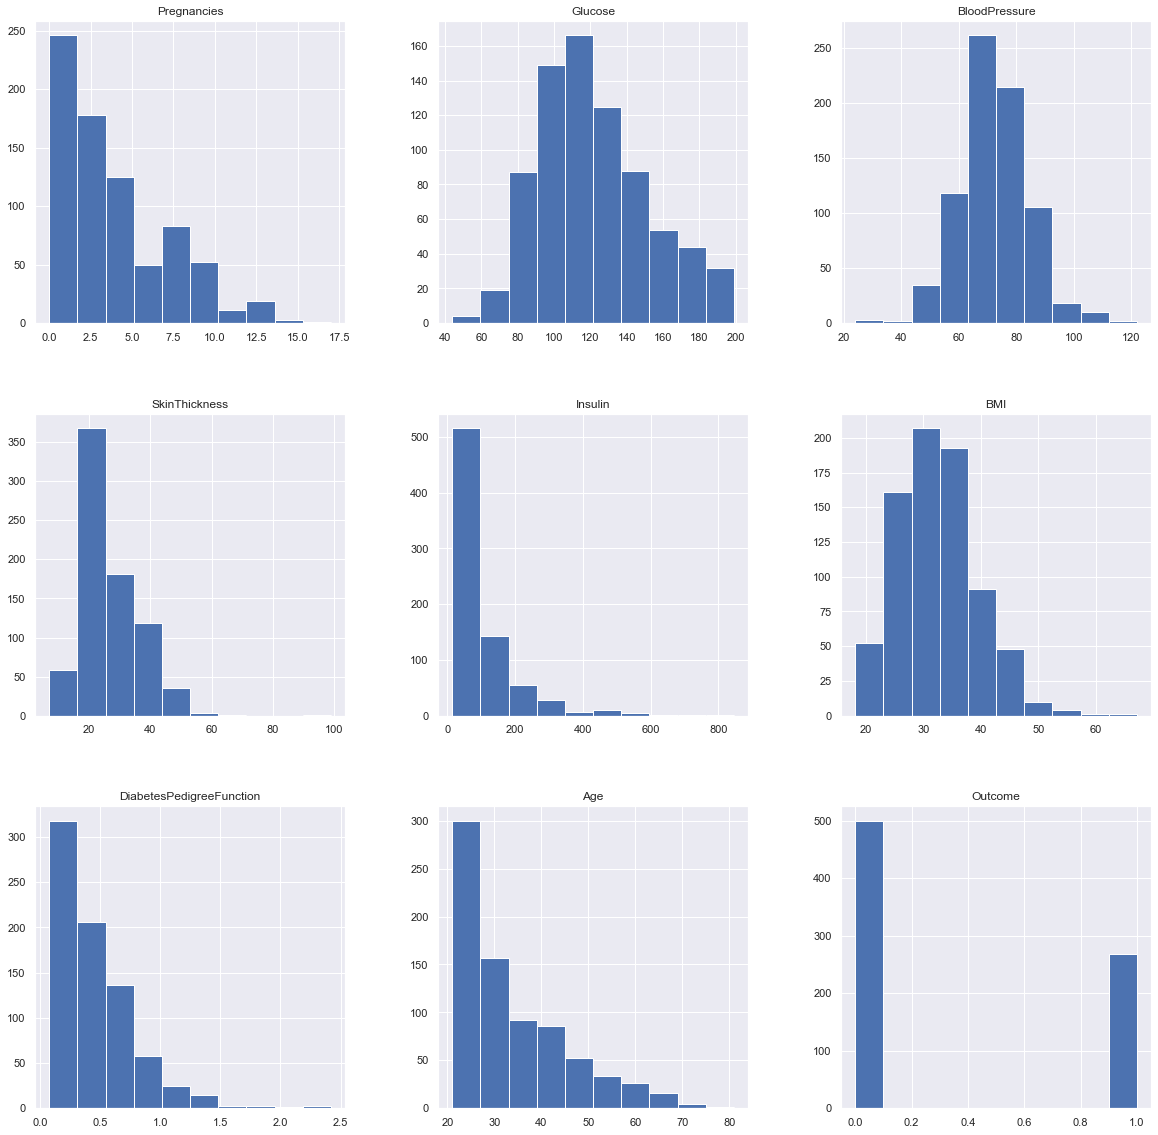

In [9]:
p=data.hist(figsize = (20,20))

**Point plot**

점의 위치에 따라 estimate of central tendency for a numeric variable

각 수치가 위치한 곳에 점을 찍어서 표현함.

<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

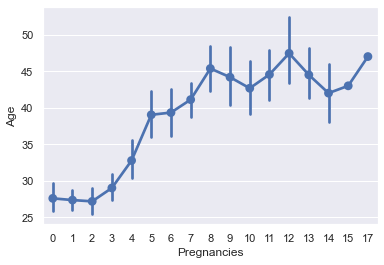

In [17]:
sns.pointplot(x='Pregnancies', y= 'Age', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

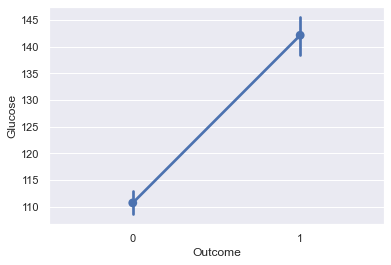

In [10]:
sns.pointplot(x='Outcome', y= 'Glucose', data=data)

**Box plot**

<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

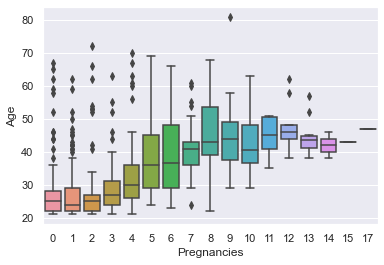

In [11]:
sns.boxplot(x='Pregnancies',y='Age',data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

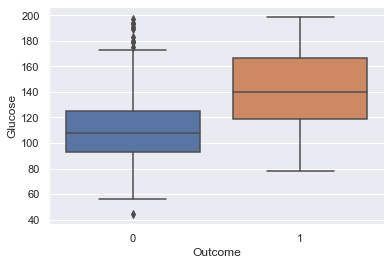

In [12]:
sns.boxplot(x='Outcome',y='Glucose',data=data)

**Pair plot**

 한 dataset에 존재하는 모든 변수들 간의 상관관계를 한 번에 보여주는 표
 
 각 X변수들 간에 어떤 관계가 있는지 보는 것도 데이터 분석에 큰 도움

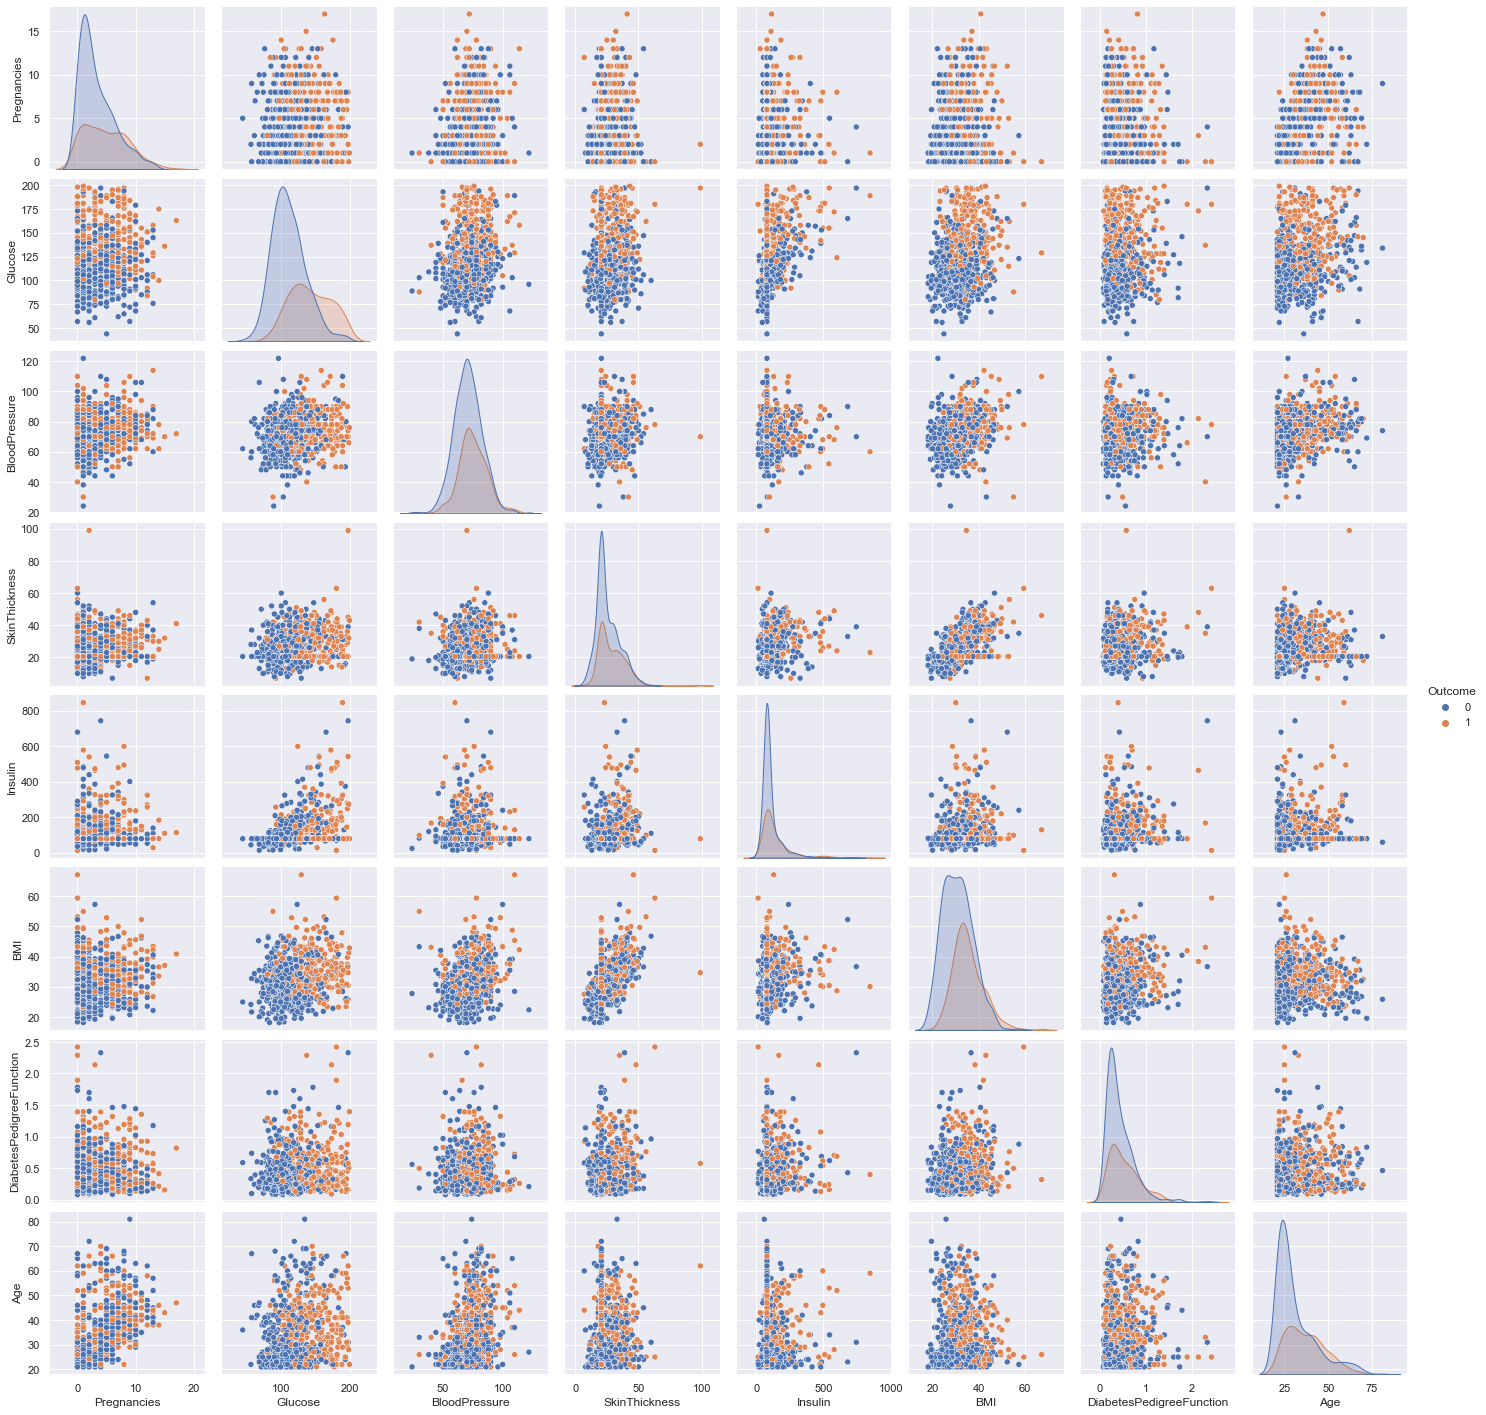

In [13]:
sns.pairplot(data,hue='Outcome')

In [14]:
data.var()

Pregnancies                   11.354056
Glucose                      926.351048
BloodPressure                146.795798
SkinThickness                 92.760798
Insulin                     8663.952981
BMI                           47.270761
DiabetesPedigreeFunction       0.109779
Age                          138.303046
Outcome                        0.227483
dtype: float64

### Data preprocessing

In [15]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [16]:
y=data.Outcome

In [17]:
print("shape of x: {}\nshape of y: {}".format(X.shape,y.shape))

shape of x: (768, 8)
shape of y: (768,)


In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=.20,random_state=5)

### Model Construction

**1.Logistic Regression**

In [19]:
log_reg = LogisticRegression(C=1,penalty='l2')
log_reg.fit(X_train,Y_train)

log_acc=accuracy_score(Y_test,log_reg.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,log_reg.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,log_reg.predict(X_test))*100))

Train Set Accuracy:76.71009771986971
Test Set Accuracy:82.46753246753246


**2.KNearestNeighbors**

In [20]:
knn = KNeighborsClassifier(n_neighbors=7)                #knn classifier
knn.fit(X_train,Y_train)

knn_acc = accuracy_score(Y_test,knn.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,knn.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,knn.predict(X_test))*100))

Train Set Accuracy:78.99022801302932
Test Set Accuracy:74.02597402597402


**3.SVC**

In [21]:
svm = SVC()
svm.fit(X_train,Y_train)    

svm_acc= accuracy_score(Y_test,svm.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,svm.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,svm.predict(X_test))*100))

Train Set Accuracy:82.08469055374593
Test Set Accuracy:77.27272727272727


**4.DecisionTreeClassifier**

In [22]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc.fit(X_train, Y_train)


dtc_acc= accuracy_score(Y_test,dtc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,dtc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,dtc.predict(X_test))*100))

Train Set Accuracy:79.64169381107492
Test Set Accuracy:72.72727272727273


**5.GradientBoostingClassifier**

In [23]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)


gbc_acc=accuracy_score(Y_test,gbc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,gbc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,gbc.predict(X_test))*100))

Train Set Accuracy:90.39087947882736
Test Set Accuracy:78.57142857142857


**6.XGBClassifier**

In [24]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.2, max_depth=30,n_estimators = 10)
xgb.fit(X_train,Y_train)

xgb_acc= accuracy_score(Y_test,xgb.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,xgb.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,xgb.predict(X_test))*100))

Train Set Accuracy:98.0456026058632
Test Set Accuracy:77.92207792207793


**7.Neural Network for Classification**

**Feature Scaling**

neural network로 보내기 전에 feature를 standard normal로 scaling하는 것이 중요.

보통 열의 각 값에서 열의 평균을 빼주고 표준편차로 나눔.

In [25]:
sc = StandardScaler()
x = sc.fit_transform(X)

**Dataset and DataLoader**

토치에서 dataset class는 기본적으로 tuple의 data를 다루며 각 data의 index에 접근할 수 있게 해줌

shuffle, mini-batch gradient descent 등을 적용하는데 사용할 수 있는 dataloader class를 만드는데 필요.

In [29]:
# Defining dataset class
import torch
from torch.utils.data import Dataset, DataLoader
class dataset(Dataset):
  def __init__(self,x,y):
    self.x = torch.tensor(x,dtype=torch.float32)
    self.y = torch.tensor(y,dtype=torch.float32)
    self.length = self.x.shape[0]
 
  def __getitem__(self,idx):
    return self.x[idx],self.y[idx]
  def __len__(self):
    return self.length
trainset = dataset(x,y)

#DataLoader
trainloader = DataLoader(trainset,batch_size=64,shuffle=False)

**Neural Network for Classsification**

nn.Module 사용하여 layer는 activation function에서 정의.

output에 sigmoid function 적용되어 binary classification에 적합한 network - neural network output은 0과 1사이

In [30]:
#defining the network
from torch import nn
from torch.nn import functional as F
class Net(nn.Module):
  def __init__(self,input_shape):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_shape,32)
    self.fc2 = nn.Linear(32,64)
    self.fc3 = nn.Linear(64,1)
  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))
    return x

BCELoss - binary cross entropy loss

In [34]:
#hyper parameters
learning_rate = 0.01
epochs = 3000
# Model , Optimizer, Loss
model = Net(input_shape=x.shape[1])
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_fn = nn.BCELoss()

**Training**

loss function에서 찾은 gradient를 사용해 weight 값을 변경하고 다음 과정 반복(loss function 최소화, 정확도 높이기)

데이터 양이 많지 않아서 train, testset 분리하지 않았음.

In [35]:
#forward loop
losses = []
accur = []
for i in range(epochs):
  for j,(x_train,y_train) in enumerate(trainloader):
    
    #calculate output
    output = model(x_train)
 
    #calculate loss
    loss = loss_fn(output,y_train.reshape(-1,1))
 
    #accuracy
    predicted = model(torch.tensor(x,dtype=torch.float32))
    acc = (predicted.reshape(-1).detach().numpy().round() == y).mean()
    
    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  if i%50 == 0:
    losses.append(loss)
    accur.append(acc)
    print("epoch {}\tloss : {}\t accuracy : {}".format(i,loss,acc))

epoch 0	loss : 0.670732855796814	 accuracy : 0.6875
epoch 50	loss : 0.5164017677307129	 accuracy : 0.74609375
epoch 100	loss : 0.457332044839859	 accuracy : 0.7747395833333334
epoch 150	loss : 0.4293963313102722	 accuracy : 0.77734375
epoch 200	loss : 0.41507092118263245	 accuracy : 0.7825520833333334
epoch 250	loss : 0.40591344237327576	 accuracy : 0.78515625
epoch 300	loss : 0.39929983019828796	 accuracy : 0.7942708333333334
epoch 350	loss : 0.3937976062297821	 accuracy : 0.7890625
epoch 400	loss : 0.38933882117271423	 accuracy : 0.7877604166666666
epoch 450	loss : 0.38579511642456055	 accuracy : 0.7864583333333334
epoch 500	loss : 0.38256052136421204	 accuracy : 0.7981770833333334
epoch 550	loss : 0.37940678000450134	 accuracy : 0.7981770833333334
epoch 600	loss : 0.37599825859069824	 accuracy : 0.7981770833333334
epoch 650	loss : 0.37297970056533813	 accuracy : 0.7994791666666666
epoch 700	loss : 0.3714171051979065	 accuracy : 0.80078125
epoch 750	loss : 0.3698243498802185	 accurac

**Analysis of the Model**

아래에 plot을 통해 잘 학습되고 있다는 것을 보여줌.

Text(0, 0.5, 'Accuracy')

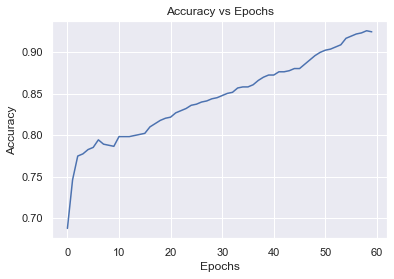

In [36]:
#printing the accuracy
plt.plot(accur)
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')